# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import requests
from requests import get
from bs4 import BeautifulSoup

In [2]:
data_read=pd.read_csv("data/dblp.tsv", sep='\t',index_col='id')

In [3]:
data_paper_c=data_read.copy()
data_paper_c.head()

,authors,year,title
id,,,
tr/meltdown/s18,"['Paul Kocher', 'Daniel Genkin', 'Daniel Gruss...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
tr/meltdown/m18,"['Moritz Lipp', 'Michael Schwarz 0001', 'Danie...",2018.0,Meltdown
tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
tr/gte/TR-0263-08-94-165,['Frank Manola'],1994.0,An Evaluation of Object-Oriented DBMS Developm...
tr/gte/TR-0222-10-92-165,"['Michael L. Brodie', 'Michael Stonebraker']",1993.0,DARWIN: On the Incremental Migration of Legacy...


## Question A1

In [4]:
with open("data/list_of_ai_conferences.txt") as file:
    lines = [line.strip() for line in file]

In [5]:
# keep only conference papers & Retain only those papers that have been published in the conferences listed in data/list_of_ai_conferences.txt
data_paper_c=data_paper_c[[ (id_.split('/',1)[0] == 'conf') & (id_.split('/',2)[1] in lines) for id_ in data_paper_c.index]]

# find the acronym of the conference where it was published & add a column named 'conference'.
data_paper_c['conference']=[id_.split('/',2)[1] for id_ in data_paper_c.index]
data_paper_c.head()

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,Three-Dimensional Scene Flow.,iccv
conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


Overall number of papers in the filtered dataset:  102003


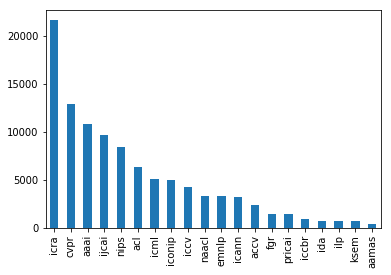

In [6]:
# overall number of papers in the filtered dataset.
print('Overall number of papers in the filtered dataset: ', data_paper_c.shape[0])

# number of papers per conference.
conferences=data_paper_c.conference.value_counts()
conferences.plot(kind='bar')

### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [7]:
# create a new dataframe centered around authors.
data_paper_c['authors']=data_paper_c.authors.map(lambda x: (re.sub('[\[\]\'"]','',x)).split(', '))
data_paper_c['title']=data_paper_c.title.map(lambda x: re.sub('\.','',x))
data_author_c=pd.DataFrame([(row_tup.Index,author,row_tup.year,row_tup.title,row_tup.conference) for row_tup in data_paper_c.itertuples(index=True) for author in row_tup.authors ],
                          columns=['id','author','year','title','conference'])

In [8]:
data_author_c.head()

,id,author,year,title,conference
0,conf/iccv/KunoOO90,Yoshinori Kuno,1990.0,Object recognition using a feature search stra...,iccv
1,conf/iccv/KunoOO90,Yasukazu Okamoto,1990.0,Object recognition using a feature search stra...,iccv
2,conf/iccv/KunoOO90,Satoshi Okada,1990.0,Object recognition using a feature search stra...,iccv
3,conf/iccv/VedulaBRCK99,Sundar Vedula,1999.0,Three-Dimensional Scene Flow,iccv
4,conf/iccv/VedulaBRCK99,Simon Baker,1999.0,Three-Dimensional Scene Flow,iccv


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

In [9]:
# fill with nan missing values in authors column
data_author_c['author'].replace('',np.nan,inplace=True)

data_author_c_grouped=data_author_c.author.value_counts(dropna=True)

In [10]:
data_author_c_grouped.sort_values(ascending=False).head(20)

Sheila A. McIlraith        918
Satinder P. Singh (ed.)    663
Luc Van Gool               220
Toshio Fukuda              196
Thomas S. Huang            186
Michael I. Jordan          168
Trevor Darrell             158
Shuicheng Yan              154
Takeo Kanade               151
Xiaoou Tang                150
Dan Roth                   144
Larry S. Davis             143
Vijay Kumar 0001           143
Wolfram Burgard            141
Eric P. Xing               137
Roland Siegwart            137
Marc Pollefeys             136
Christopher D. Manning     136
Martial Hebert             135
Andrew Zisserman           134
Name: author, dtype: int64

# 2 cases of outliers:

#### Question: do we drop also for data papers centered ? 

Answer: Yes as we want the data to be consistent so to be always the smae in both dataframes !

We understand that Sheila A. McIlraith organised a conference of aaai in 2018 so we drop it. 


## Case 1: Sheila A. McIlraith

In [11]:
data_author_c[data_author_c['author'] == "Sheila A. McIlraith"][['id','year']].apply(lambda x: (x.id.split('/',2)[1], x.year), axis=1).value_counts()

(aaai, 2018.0)             890
(ijcai, 2016.0)              3
(ijcai, 2018.0)              2
(ijcai, <i>2016.0</i>)       1
(aaai, 2015.0)               1
(aaai, 2017.0)               1
(ijcai, 2009.0)              1
(icml, 2018.0)               1
(aaai, <em>2011.0</em>)      1
(aaai, 2008.0)               1
(ijcai, 2007.0)              1
(aaai, '00)                  1
(aaai, <em>2017.0</em>)      1
(aaai, '17)                  1
(aaai, 2013.0)               1
(ijcai, 2013.0)              1
(ijcai, '17)                 1
(aaai, 2006.0)               1
(aaai, 2010.0)               1
(aaai, 2007.0)               1
(ijcai, 2011.0)              1
(aaai, 2014.0)               1
(ijcai, <i>2001.0</i>)       1
(aaai, <em>1997.0</em>)      1
(ijcai, 2003.0)              1
(aaai, <em>2014.0</em>)      1
dtype: int64

For author Sheila A. McIlraith, in 2018, after online verifications, she didn't write any aaai paper. So we drop all of them (Sheila A. McIlraith, aaai, 2018)

In [12]:
index_outliers_sheila = data_author_c[(data_author_c['conference'] == 'aaai') & (data_author_c['author'] == "Sheila A. McIlraith")
                                     & (data_author_c['year'] == '2018.0')]

data_author_c.drop(index_outliers_sheila.index, inplace=True)

data_paper_c.drop(index_outliers_sheila.id, inplace=True)

In [13]:
data_author_c[data_author_c['author'] == "Sheila A. McIlraith"].id.map(lambda x: x.split('/',2)[1]).value_counts()

aaai     14
ijcai    13
icml      1
Name: id, dtype: int64

## Case 2: Satinder P. Singh (ed.)

In [14]:
data_author_c[data_author_c.author.str.contains("Satinder P. Singh", na=False)].author.value_counts()

Satinder P. Singh (ed.)    663
Satinder P. Singh           85
Name: author, dtype: int64

We notice that we have 2 formulations for this author: Satinder P. Singh and Satinder P. Singh (ed.). By checking online, we found out that Satinder P. Singh (ed.) is in fact reprensents editions of the articles, and not its author. So we drop all rows having as author Satinder P. Singh (ed.)

In [15]:
index_outliers_ed = data_author_c[(data_author_c['author'] == "Satinder P. Singh (ed.)")]

data_author_c.drop(index_outliers_ed.index, inplace=True)

data_paper_c.drop(index_outliers_ed.id, inplace=True)

## New plot after fixing outliers

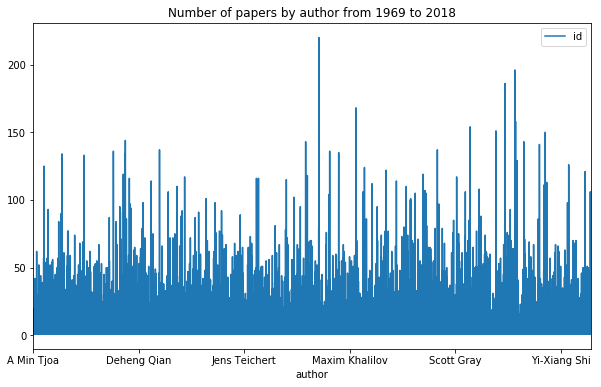

In [16]:
data_author_c.groupby('author').count()[['id']].plot(figsize=(10, 6),title='Number of papers by author from 1969 to 2018')

***A3.2***

In [17]:
data_paper_c.head()

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990.0,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999.0,Three-Dimensional Scene Flow,iccv
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


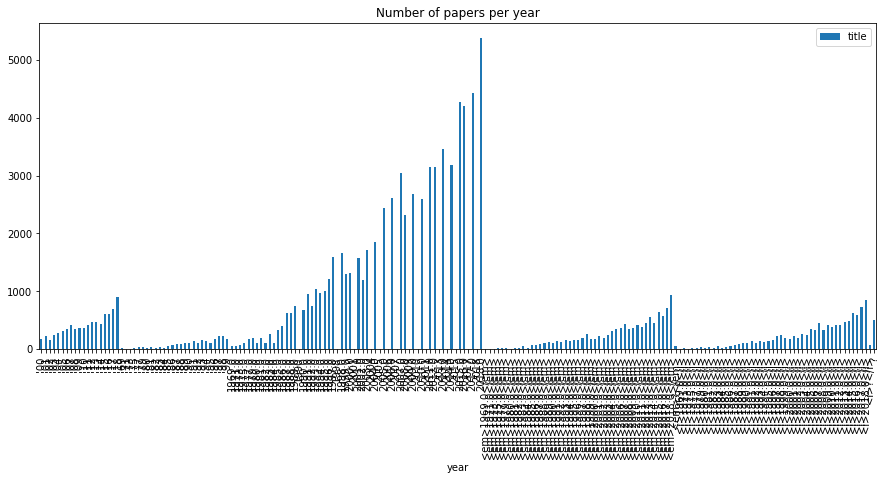

In [18]:
# Plot the number of papers per year.
data_papers_per_year=data_paper_c.groupby('year').count()[['title']]
data_papers_per_year.plot(kind='bar',figsize=(15, 6),title='Number of papers per year')

## Data formatting

Here we formatted and cleaned the column year from its format inconsistencies. 

In [19]:
data_paper_c['year'] = data_paper_c.year.map(lambda year : BeautifulSoup(year, 'html.parser' ).get_text(), na_action='ignore')
data_paper_c['year'] = data_paper_c['year'].map(lambda x: (re.sub('\.0','',x)))

data_paper_c['year']= data_paper_c['year'].map(lambda x: re.sub('\'0','200',x))
data_paper_c['year']= data_paper_c['year'].map(lambda x: re.sub('\'1','201',x))
data_paper_c['year']= data_paper_c['year'].map(lambda x: re.sub('\'','19',x))

data_paper_c.head()

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999,Three-Dimensional Scene Flow,iccv
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


In [20]:
# New plot of the number of papers per year formatted.

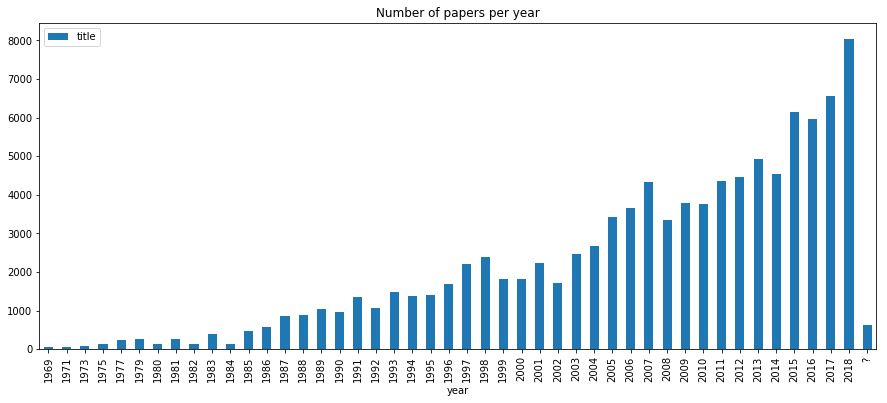

In [21]:
data_papers_per_year=data_paper_c.groupby('year').count()[['title']]
data_papers_per_year.plot(kind='bar',figsize=(15, 6),title='Number of papers per year')

***A3.3***

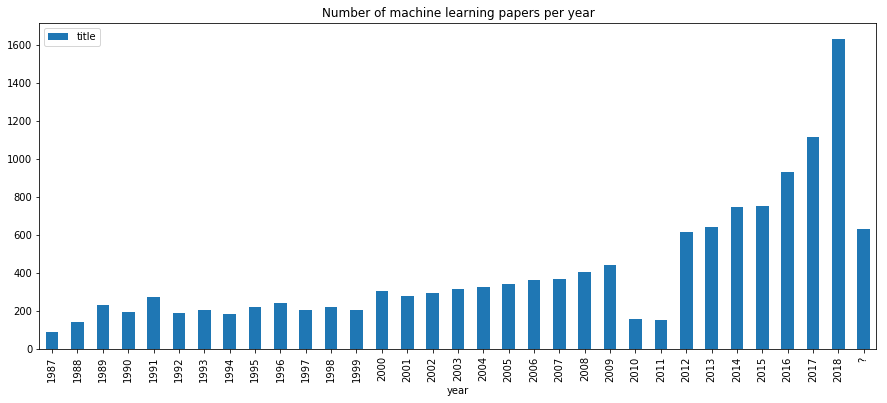

In [22]:
# new dataframe with only NIPS and ICML
mlconf = ['icml', 'nips']

# plot the number of ML papers over time
ml_papers=data_paper_c[[conf in mlconf for conf in data_paper_c.conference]]
ml_papers.groupby('year').count()[['title']].plot(kind='bar', figsize=(15, 6),title='Number of machine learning papers per year')

We notice 2 things: there may be missing papers over years 2010 and 2011. Also, we notice that we have a column with label '?' depicting a missing year. We infer that those missing papers over 2010 and 2011 are the ones whose year publishments are missing values.

Let's analyse from which conference we have most missing year:

In [23]:
ml_papers[ml_papers.year == '?'].groupby('conference').count()

,authors,year,title
conference,,,
nips,634,634,634


Effectively, we see that all missing years are from one single ML conference, nips.


***A3.4***

In [24]:
# request the NIPS data from website
r = requests.get('https://papers.nips.cc/') 

In [25]:
# html parsing
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

In [26]:
# find all links related
all_links = soup.find_all('a')

In [27]:
# build dataframe with website data 
web_data=[]

for link in all_links:
    if link.get('href').startswith('/book'):
        year=re.findall(r'\d+', link.text)[-1]

        year_request=requests.get('https://papers.nips.cc'+link.get('href')) 
        soup_year = BeautifulSoup(year_request.text, 'html.parser')
        main_wrapper = soup_year.find('div', class_='main wrapper clearfix')
        main_text= main_wrapper.find('ul')
        publications_wrappers = main_text.find_all('li',class_=None)

        for p in publications_wrappers:
                title=p.find('a').text
                authors=[]
                for author in p.find_all('a', class_='author'):
                    authors.append(author.text)

                web_data.append({'title':title,'authors': authors, 'year':year})
                
df_web_data=pd.DataFrame(web_data)

In [28]:
# merge dataframes paper_centric_data and web_data
df_inner=pd.merge(data_paper_c.reset_index(), df_web_data, on=['title'], how='left').set_index('id')

In [29]:
df_inner.head()  

,authors_x,year_x,title,conference,authors_y,year_y
id,,,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990,Object recognition using a feature search stra...,iccv,NaN,NaN
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999,Three-Dimensional Scene Flow,iccv,NaN,NaN
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv,NaN,NaN
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990,Qualitative 3-D shape reconstruction using dis...,iccv,NaN,NaN
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv,NaN,NaN


By data scraping we get the following values we obtain as new information the following:

In [30]:
df_inner[(df_inner.year_x.apply(lambda year: year=='?')) & (df_inner.conference == 'nips') 
        & ~(df_inner.year_y.apply(lambda year: pd.isnull(year)))] 

,authors_x,year_x,title,conference,authors_y,year_y
id,,,,,,
conf/nips/WangSJ11,"[Zuoguan Wang, Gerwin Schalk, Qiang Ji]",?,Anatomically Constrained Decoding of Finger Fl...,nips,"[Zuoguan Wang, Gerwin Schalk, Qiang Ji]",2011
conf/nips/BachM10,"[Stephen H. Bach, Marcus A. Maloof]",?,A Bayesian Approach to Concept Drift,nips,"[Stephen Bach, Mark Maloof]",2010
conf/nips/KolarBRS11,"[Mladen Kolar, Sivaraman Balakrishnan, Alessan...",?,Minimax Localization of Structural Information...,nips,"[Mladen Kolar, Sivaraman Balakrishnan, Alessan...",2011
conf/nips/LempitskyZ10,"[Victor S. Lempitsky, Andrew Zisserman]",?,Learning To Count Objects in Images,nips,"[Victor Lempitsky, Andrew Zisserman]",2010
conf/nips/Kpotufe11,[Samory Kpotufe],?,k-NN Regression Adapts to Local Intrinsic Dime...,nips,[Samory Kpotufe],2011
...,...,...,...,...,...,...
conf/nips/VaroquauxGPT10,"[Gaël Varoquaux, Alexandre Gramfort, Jean-Bapt...",?,Brain covariance selection: better individual ...,nips,"[Gael Varoquaux, Alexandre Gramfort, Jean-bapt...",2010
conf/nips/KolterBN10,"[J. Zico Kolter, Siddharth Batra, Andrew Y. Ng]",?,Energy Disaggregation via Discriminative Spars...,nips,"[J. Z. Kolter, Siddharth Batra, Andrew Y. Ng]",2010
conf/nips/WangLSDC10,"[Eric Wang, Dehong Liu, Jorge G. Silva, David ...",?,Joint Analysis of Time-Evolving Binary Matrice...,nips,"[Eric Wang, Dehong Liu, Jorge Silva, Lawrence ...",2010


In [31]:
# we build a new dataframe, with missing values filled
completed=[]

for index, row in df_inner.iterrows(): 
    if (row['year_x'] =='?') & (row['conference'] == 'nips'):
        completed.append({'id':index, 'authors':row.authors_x, 'year':row.year_y, 'title':row.title, 'conference':row.conference})
    else: 
        completed.append({'id':index, 'authors':row.authors_x, 'year':row.year_x, 'title':row.title, 'conference':row.conference})

df_completed=pd.DataFrame(completed).set_index('id')

In [32]:
df_completed

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999,Three-Dimensional Scene Flow,iccv
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv
...,...,...,...,...
conf/acl/Kuhn02,[Jonas Kuhn],2002,OT Syntax - Decidability of Generation-based O...,acl
conf/acl/PantelLG12,"[Patrick Pantel, Thomas Lin, Michael Gamon]",2012,Mining Entity Types from Query Logs via User I...,acl
conf/acl/BarbuM01,"[Catalina Barbu, Ruslan Mitkov]",2001,Evaluation Tool for Rule-based Anaphora Resolu...,acl


In [33]:
# drop remaining missing values
df_completed = df_completed.dropna()

In [34]:
# drop rows with missing authors 
df_completed=df_completed[[author != [''] for author in df_completed.authors]]

In [35]:
df_completed

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999,Three-Dimensional Scene Flow,iccv
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv
...,...,...,...,...
conf/acl/Kuhn02,[Jonas Kuhn],2002,OT Syntax - Decidability of Generation-based O...,acl
conf/acl/PantelLG12,"[Patrick Pantel, Thomas Lin, Michael Gamon]",2012,Mining Entity Types from Query Logs via User I...,acl
conf/acl/BarbuM01,"[Catalina Barbu, Ruslan Mitkov]",2001,Evaluation Tool for Rule-based Anaphora Resolu...,acl


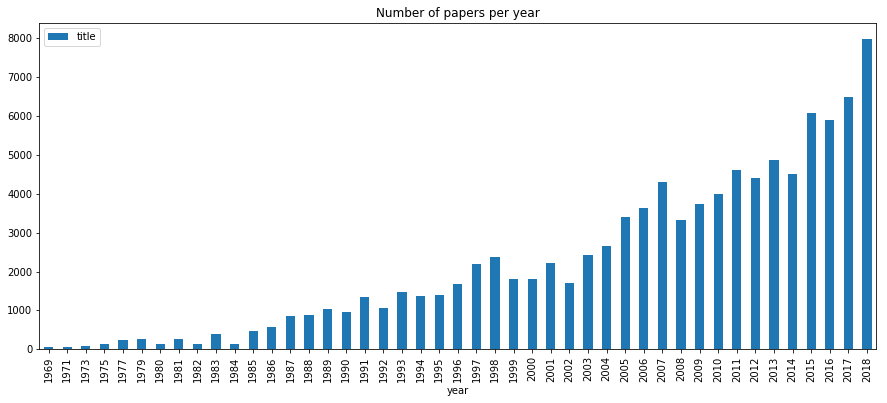

In [36]:
# plot completed number of papers per year
df_completed.groupby('year').count()[['title']].plot(kind='bar',figsize=(15, 6),title='Number of papers per year')

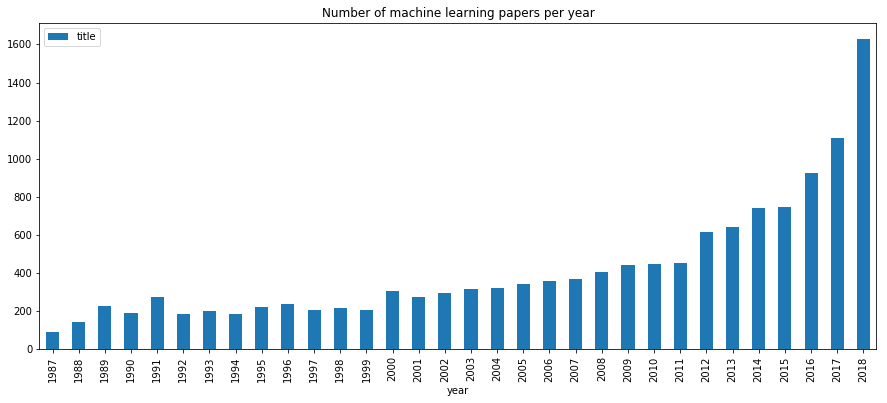

In [37]:
# plot completed number of ML papers per year
ml_papers_completed=df_completed[[conf in mlconf for conf in df_completed.conference]]
ml_papers_completed.groupby('year').count()[['title']].plot(kind='bar', figsize=(15, 6),title='Number of machine learning papers per year')

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [38]:
df_completed.head()

,authors,year,title,conference
id,,,,
conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990,Object recognition using a feature search stra...,iccv
conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999,Three-Dimensional Scene Flow,iccv
conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


In [39]:
# we reconstruct the author-centric dataframe from completed paper-centric dataframe for consistency of the data
data_author_c_completed = df_completed.explode('authors')

In [40]:
data_author_c_completed

,authors,year,title,conference
id,,,,
conf/aaai/0001CZ17,Tian Tian 0001,2017,Learning Attributes from the Crowdsourced Rela...,aaai
conf/aaai/0001CZ17,Ning Chen,2017,Learning Attributes from the Crowdsourced Rela...,aaai
conf/aaai/0001CZ17,Jun Zhu 0001,2017,Learning Attributes from the Crowdsourced Rela...,aaai
conf/aaai/0001D17,Ashok K. Goel 0001,2017,What's Hot in Case-Based Reasoning,aaai
conf/aaai/0001D17,Belén Díaz-Agudo,2017,What's Hot in Case-Based Reasoning,aaai
...,...,...,...,...
conf/pricai/ZukermanJMG00,Sarah George,2000,Recognizing Intentions from Rejoinders in a Ba...,pricai
conf/pricai/ZukermanMNG08,Ingrid Zukerman,2008,A Probabilistic Approach to the Interpretation...,pricai
conf/pricai/ZukermanMNG08,Enes Makalic,2008,A Probabilistic Approach to the Interpretation...,pricai


In [41]:
# compute year range for papers of each author 
def range_min_max(x):
    return x.astype(int).max() - x.astype(int).min() + 1 

data_year_range=data_author_c_completed.groupby(data_author_c_completed.authors).year.apply(range_min_max)

In [42]:
data_year_range = pd.DataFrame(data_year_range)
data_year_range.sort_values(by='year',ascending= False) 

,year
authors,
Eugene Charniak,48
Stuart C. Shapiro,47
Victor R. Lesser,46
Ruzena Bajcsy,46
Aaron Sloman,46
...,...
David Lin,1
Marco La Civita,1
Marco Leo,1


In [43]:
# compute number of published papers per author
paper_count = pd.DataFrame(data_author_c_completed.groupby(data_author_c_completed.authors).size(), columns = ['count'])
paper_count.sort_values(by='count',ascending= False) 

,count
authors,
Luc Van Gool,218
Toshio Fukuda,196
Thomas S. Huang,186
Michael I. Jordan,168
Trevor Darrell,158
...,...
Chan Ho Park,1
Michel dos Santos Mesquita,1
Michela Aquilano,1


In [44]:
ratio = pd.merge(paper_count, data_year_range, on = 'authors' )

In [45]:
ratio['ratio'] = ratio['count'] / ratio['year']

In [46]:
ratio.sort_values(by='count',ascending= False, inplace = True) 
ratio.head()

,count,year,ratio
authors,,,
Luc Van Gool,218,29,7.517241
Toshio Fukuda,196,35,5.600000
Thomas S. Huang,186,37,5.027027
Michael I. Jordan,168,30,5.600000
Trevor Darrell,158,31,5.096774


Text(0.5,1,'Distribution of normalized paper count per author')

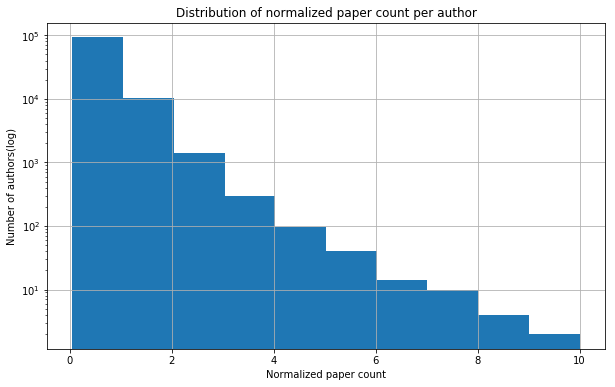

In [47]:
plt.xlabel('Normalized paper count')
plt.ylabel('Number of authors(log)')
ratio.ratio.hist(log = True, bins = 10, figsize=(10, 6)).set_title('Distribution of normalized paper count per author')

After plotting distribution of normalized paper count per author on a log scale, we notice a linear relation.
Most of normalized paper counts are less than 2. And as the normalized paper count increases, the number of related authors decreases exponentially.
Hence we recognize the exponential distribution law.

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [48]:
data_author_c_completed.sample(10)

,authors,year,title,conference
id,,,,
conf/ksem/TangZRA07,Sharifuddin Mohd. Zain,2007,An Ontology-Based Reasoning Framework for Reac...,ksem
conf/icra/JafariGKYR17,Oliver Groth,2017,Analyzing modular CNN architectures for joint ...,icra
conf/icra/PhamMT18,Giovanni De Magistris,2018,OptLayer - Practical Constrained Optimization ...,icra
conf/naacl/RameshS18,Sree Harsha Ramesh,2018,Neural Machine Translation for Low Resource La...,naacl
conf/accv/ResoJRO14,Matthias Reso,2014,Superpixels for Video Content Using a Contour-...,accv
conf/icra/SuhLKYO03,Bong Oh Kim,2003,Design and implementation of a behavior-based ...,icra
conf/ijcai/KollerP99,Daphne Koller,1999,Computing Factored Value Functions for Policie...,ijcai
conf/nips/Luo0S0Z18,Bo Zhang,2018,Semi-crowdsourced Clustering with Deep Generat...,nips
conf/icra/BrookCH11,Peter Brook,2011,Collaborative grasp planning with multiple obj...,icra


In [49]:
df_auth=data_author_c_completed.copy()
df_auth.reset_index(drop=False, inplace=True)
# We sort the frequency
auth_freq=df_auth.authors.value_counts()
# We create a dataframe for future manipulation
ranking=pd.DataFrame({"papers": auth_freq, "author" : auth_freq.index})
ranking.reset_index(drop=True, inplace=True)
ranking["rank"]=ranking.index+1
ranking.set_index("rank", inplace=True)
ranking.head(20)

,papers,author
rank,,
1,218,Luc Van Gool
2,196,Toshio Fukuda
3,186,Thomas S. Huang
4,168,Michael I. Jordan
5,158,Trevor Darrell
6,153,Shuicheng Yan
7,151,Takeo Kanade
8,148,Xiaoou Tang
9,143,Vijay Kumar 0001


The data correspends to what we found in the plot of A3.1.
The ranking should be affected by whether the author was the lead author or not
Let's take a look the first author in ranking: Luc Van Gool with 218 papers
If we look at the id of each paper, we see that after the conference name, we find the last name of the lead author, then the initials of the other authors. So we can filter by lead author.
Let's see how many papers is he the lead author in:

In [50]:
df_auth[(df_auth.authors=="Luc Van Gool") & df_auth.id.apply(lambda x : "Gool" in x)]

,id,authors,year,title,conference
62765,conf/cvpr/GoolKO91,Luc Van Gool,1991,Recognition and semi-differential invariants,cvpr
62768,conf/cvpr/GoolMP96,Luc Van Gool,1996,Mirror and Point Symmetry under Perspective Sk...,cvpr
123952,conf/iccv/GoolPH17,Luc Van Gool,2017,Optimal Transformation Estimation with Semanti...,iccv
123955,conf/iccv/GoolWVO90,Luc Van Gool,1990,Similarity extraction and modeling,iccv


Luc Van Gool was the lead author in 4 of his 218 papers. This is clearly a limitation .
Another limitation is that some conferences are more important than others. Let's take a look at the second in ranking, Toshio Fukuda, and see the conferences that he published in:

In [51]:
df_auth[(df_auth.authors=="Toshio Fukuda")].conference.value_counts()

icra    196
Name: conference, dtype: int64

All of his papers were published in one conference: icra. The importance of his impact will be highly dependant on the quality of the icra conference

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [52]:
aminer= pd.read_csv("data/aminer_ai.csv", sep=';', header=0)
aminer["Short Name"]=aminer["Short Name"].map(lambda x : str(x).lower())
df_h5=pd.merge(df_auth, aminer, how="left", left_on=["conference"], right_on=["Short Name"])
df_h5.drop('Short Name', axis=1, inplace=True)
df_h5.head()

,id,authors,year,title,conference,Rank,Conference (Full Name),H5-Index
0,conf/aaai/0001CZ17,Tian Tian 0001,2017,Learning Attributes from the Crowdsourced Rela...,aaai,14,AAAI Conference on Artificial Intelligence,44
1,conf/aaai/0001CZ17,Ning Chen,2017,Learning Attributes from the Crowdsourced Rela...,aaai,14,AAAI Conference on Artificial Intelligence,44
2,conf/aaai/0001CZ17,Jun Zhu 0001,2017,Learning Attributes from the Crowdsourced Rela...,aaai,14,AAAI Conference on Artificial Intelligence,44
3,conf/aaai/0001D17,Ashok K. Goel 0001,2017,What's Hot in Case-Based Reasoning,aaai,14,AAAI Conference on Artificial Intelligence,44
4,conf/aaai/0001D17,Belén Díaz-Agudo,2017,What's Hot in Case-Based Reasoning,aaai,14,AAAI Conference on Artificial Intelligence,44


***B2.2***

In [53]:
new_ranking=df_h5.groupby("authors")["H5-Index"].sum().sort_values(ascending=False)
new_ranking=pd.DataFrame({"score": new_ranking.values, "author" : new_ranking.index})
new_ranking["rank"]=new_ranking.index+1
new_ranking.set_index("rank", inplace=True)
new_ranking.head(20)

,score,author
rank,,
1,18607,Luc Van Gool
2,14052,Thomas S. Huang
3,13102,Xiaoou Tang
4,12763,Trevor Darrell
5,12404,Shuicheng Yan
6,11368,Toshio Fukuda
7,11265,Marc Pollefeys
8,11097,Larry S. Davis
9,10629,Martial Hebert


***B2.3***

In [54]:
old_20=ranking.head(20).author.values
new_20=new_ranking.head(20).author.values
absents=[]
for old in old_20:
    if not( old in new_20):
        absents.append(old)
        
new_ranking[new_ranking.author.isin(absents)]

,score,author
rank,,
24,8334,Vijay Kumar 0001
28,8111,Roland Siegwart
31,7879,Wolfram Burgard
33,7812,Eric P. Xing
39,7167,Bernhard Schölkopf
61,5713,Dan Roth
64,5657,Christopher D. Manning
83,5314,Dan Klein


***B2.4***

In [55]:
with open("data/list_of_selected_authors.txt","r") as f:
    selected_auth = f.read().splitlines() 


In [56]:
rs=ranking[ranking.author.isin(selected_auth)]
rs

,papers,author
rank,,
2362,17,Hy Murveit
3599,13,Mengjie Zhang
4242,11,Naokazu Yokoya
5119,10,Sebastian Otte
5595,9,Jianwu Dang
28166,2,Charles Freundlich
37609,2,Yukihiro Nakamura
39960,2,Parag Havaldar
40271,2,Iljung S. Kwak


In [57]:
nrs=new_ranking[new_ranking.author.isin(selected_auth)]
nrs

,score,author
rank,,
19037,170,Iljung S. Kwak
19071,170,Yukihiro Nakamura
19178,170,Steffen Abraham
19367,170,Parag Havaldar
19648,170,Hy Murveit
19673,170,Charles Freundlich
20868,158,Naokazu Yokoya
21664,148,Sebastian Otte
22326,140,Mengjie Zhang


In [58]:
pd.merge(rs.reset_index(drop=False),nrs.reset_index(drop=False),left_on="author",right_on="author", suffixes=["_by_paper","_by_h5"])

,rank_by_paper,papers,author,rank_by_h5,score
0,2362,17,Hy Murveit,19648,170
1,3599,13,Mengjie Zhang,22326,140
2,4242,11,Naokazu Yokoya,20868,158
3,5119,10,Sebastian Otte,21664,148
4,5595,9,Jianwu Dang,40930,78
5,28166,2,Charles Freundlich,19673,170
6,37609,2,Yukihiro Nakamura,19071,170
7,39960,2,Parag Havaldar,19367,170
8,40271,2,Iljung S. Kwak,19037,170
9,41250,2,Steffen Abraham,19178,170


We see that authors with only 2 papers have better h5 score with authors with 10 to 13 papers (equal to an author's score with 17 papers)
By choosing the naive ranking we disregard the quality of papers over others by assuming that they have the same importance

***B2.5***

In [59]:
# We will take the number of papers published by conference from the top 20 ranked author with H5-index
top_conf=pd.DataFrame(df_h5[df_h5.authors.isin(new_20)].conference.value_counts()).reset_index(drop=False)
top_conf=top_conf.rename(columns={"index" :"conference","conference":"freq"})
# and merge it with the aminer dataset
h5_analysis=pd.merge(top_conf,aminer,how="left",left_on=["conference"],right_on=["Short Name"])
h5_analysis

,conference,freq,Rank,Conference (Full Name),Short Name,H5-Index
0,cvpr,1338,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112
1,iccv,536,6,International Conference on Computer Vision,iccv,58
2,icra,323,5,IEEE International Conference on Robotics and ...,icra,58
3,nips,268,8,Annual Conference on Neural Information Proces...,nips,51
4,fgr,96,95,International Conference on Automatic Face and...,fgr,1
5,accv,82,73,Asian Conference on Computer Vision,accv,10
6,icml,81,7,International Conference on Machine Learning,icml,56
7,aaai,56,14,AAAI Conference on Artificial Intelligence,aaai,44
8,ijcai,45,21,International Joint Conference on Artificial I...,ijcai,35
9,naacl,6,71,The Annual Conference of the North American Ch...,naacl,10


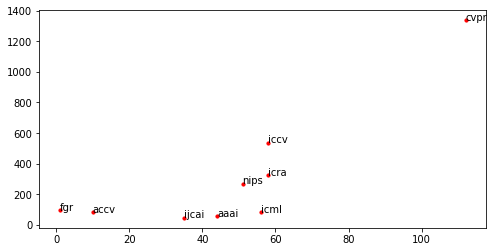

In [60]:
# Let's plot the top 10 conference by paper frequency
fig, ax = plt.subplots(figsize=(8, 4))
x=h5_analysis["H5-Index"][0:9]
y=h5_analysis.freq[0:9]
ax.scatter(x, y, s=10, color="red", )

for i, txt in enumerate(h5_analysis.conference[0:9]):
    ax.annotate(txt, (x[i], y[i]))

cvpr papers have a big impact on the ranking since its score is almost the double of the second in ranking (112 vs 58)
let's try to see its impact if the score is set to 1

In [61]:
cvpr_h5=df_h5.copy()
cvpr_h5["H5-Index"]=cvpr_h5["H5-Index"].replace(112,1)

In [62]:
cvpr_1=cvpr_h5.groupby("authors")["H5-Index"].sum().sort_values(ascending=False)
cvpr_1=pd.DataFrame({"score": cvpr_1.values, "author" : cvpr_1.index})
cvpr_1["rank"]=cvpr_1.index+1
cvpr_1.set_index("rank", inplace=True)
cvpr_1.head(20)


,score,author
rank,,
1,11368,Toshio Fukuda
2,8557,Michael I. Jordan
3,8223,Vijay Kumar 0001
4,7667,Roland Siegwart
5,7657,Wolfram Burgard
6,6699,Joel W. Burdick
7,6668,Gerd Hirzinger
8,6581,Daniela Rus
9,6380,Fumihito Arai


We see that the ranking is starting to look a lot like the naive one,Luc Van Gool who was 4th before is no longer in top 20, which shows the size of this conference's impact on the ranking
let's try again with cvpr set to the mean score

In [63]:
cvpr_h5=df_h5.copy()
m=int(cvpr_h5["H5-Index"].mean())
cvpr_h5["H5-Index"]=cvpr_h5["H5-Index"].replace(112,m)

In [64]:
cvpr_m=cvpr_h5.groupby("authors")["H5-Index"].sum().sort_values(ascending=False)
cvpr_m=pd.DataFrame({"score": cvpr_m.values, "author" : cvpr_m.index})
cvpr_m["rank"]=cvpr_m.index+1
cvpr_m.set_index("rank", inplace=True)
cvpr_m.head(20)


,score,author
rank,,
1,11368,Toshio Fukuda
2,10423,Luc Van Gool
3,8704,Michael I. Jordan
4,8272,Vijay Kumar 0001
5,7989,Trevor Darrell
6,7976,Thomas S. Huang
7,7863,Roland Siegwart
8,7755,Wolfram Burgard
9,7522,Xiaoou Tang


This ranking is slightly better adjusted and more resiliant to the conference score ( for cvpr )

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [65]:
ratio.reset_index(drop=False,inplace=True)
new_ranking.head(20)

,score,author
rank,,
1,18607,Luc Van Gool
2,14052,Thomas S. Huang
3,13102,Xiaoou Tang
4,12763,Trevor Darrell
5,12404,Shuicheng Yan
6,11368,Toshio Fukuda
7,11265,Marc Pollefeys
8,11097,Larry S. Davis
9,10629,Martial Hebert


In [66]:
# We combine the ratio df with the h5 ranking
year_ranking=pd.merge(new_ranking,ratio,how="left",left_on=["author"],right_on=["authors"])
year_ranking.drop({"authors","ratio"},axis=1,inplace=True)
year_ranking["rank"]=year_ranking.index +1
year_ranking.set_index("rank", inplace=True)
year_ranking.rename(columns={"score":"H5_score", "index" : "naive_ranking", "count": "papers", "year":"years_of_activity"},inplace=True)
# we create a new ranking based on h5 score by year of activity
year_ranking["yearly_score"]=year_ranking["H5_score"]/year_ranking["years_of_activity"]

year_ranking.sort_values(by="yearly_score",ascending=False).head(20)

,H5_score,author,papers,years_of_activity,yearly_score
rank,,,,,
396,2816,Li Fei-Fei 0001,30,3,938.666667
3,13102,Xiaoou Tang,148,16,818.875000
5,12404,Shuicheng Yan,153,17,729.647059
75,5475,Jiashi Feng,70,8,684.375000
1,18607,Luc Van Gool,218,29,641.620690
16,9869,Xiaogang Wang,109,16,616.812500
571,2364,Xiaodan Liang,29,4,591.000000
94,5139,Stefanos Zafeiriou,64,10,513.900000
21,8599,Raquel Urtasun,107,17,505.823529


We see from the old ranking that only 6 from the old top 20 remained, while we see that the first author now was ranked 396th before.
We also see the rise of the author "Jinshan Pan" who was 2257th before.
While this ranking gives importance to the yearly activity of research, it disregards the fact the research on AI is relatively new and that it's continuously on the rise ( we can see that none of the top 20 has more than 30 years of research )

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [67]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [68]:
clean_df=df_completed.copy()
#We remove stopwords from titles and put all titles in lowercase to prepare for later processing
clean_df["title"]=clean_df["title"].apply(lambda x: stopword_remover(lowercase_all(remove_punct(str(x)))).split(" "))

In [69]:
#Constructing  paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words 
# “logic”, “planning”, “control”
words_symbolic = ['logic', 'planning', 'control']
symbolic=clean_df[clean_df["title"].apply(lambda x: any(word in x for word in words_symbolic))]


In [70]:
#Constructing  paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words 
#'deep', 'learning', 'feature', 'bayesian'
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
connectionist=clean_df[clean_df["title"].apply(lambda x: any(word in x for word in words_connectionist))]


In [71]:
w = words_symbolic + words_connectionist
w

['logic', 'planning', 'control', 'deep', 'learning', 'feature', 'bayesian']

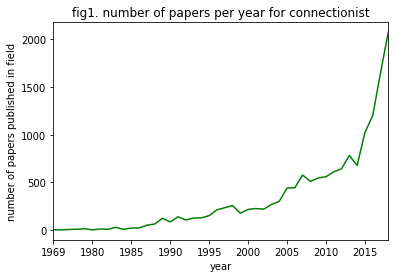

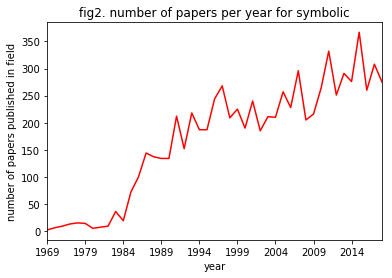

In [72]:
# Plot the number of papers per year for symbolic and connectionist 
connectionist.groupby("year").size().plot(color='green')
plt.ylabel('number of papers published in field')
plt.title('fig1. number of papers per year for connectionist')
plt.show()
symbolic.groupby("year").size().plot(color='red')
plt.ylabel('number of papers published in field')
plt.title('fig2. number of papers per year for symbolic')
plt.show()


Describing the trends observed based on these two plots alone : 

<u>Symbolic plot :</u>
The number of AI papers with symbolic approach to AI was stale from 1969 to 1984 then rose drastically in 1984 from 15 papers published to 144 in 1987. The number continued to rise slowly from there to 304 in 2018

<u>Connectionist plot :</u>
The number of AI papers with connectionist approach to AI was stale from 1969 to the year 2000 then rose drastically in 2000 from 217 papers published to 2342 in 2018.

=> From these two plots we can conclude that the connectionist approach is more popular than symbolic approach, having 2342 papers in that field in 2018 compared to 304 for symbolic. The connectionist approach started appearing more in research (in a consistent way ) from the year 2000 and the gap has only widened since. 

In [73]:
print("Number of connectionist papers in 2018 : ",connectionist.groupby("year").size()[-1])
print("Number of symbolic papers in 2018 : ",symbolic.groupby("year").size()[-1])

Number of connectionist papers in 2018 :  2075
Number of symbolic papers in 2018 :  275


### Plotting additional plots to form an opinion about popularity

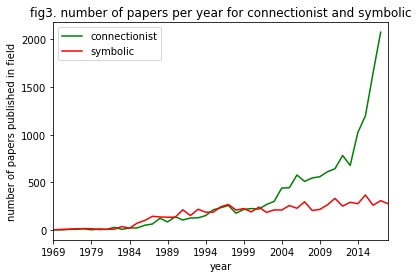

In [74]:
# plotting the two research flavors together
ax1 = connectionist.groupby("year").size().plot(color='green',label = 'connectionist')
plt.ylabel('number of papers published in field')
plt.title('fig3. number of papers per year for connectionist and symbolic')
ax2 = symbolic.groupby("year").size().plot(color='red',label='symbolic')

#get legends for the plot
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h2, l2, loc=2)
plt.show()


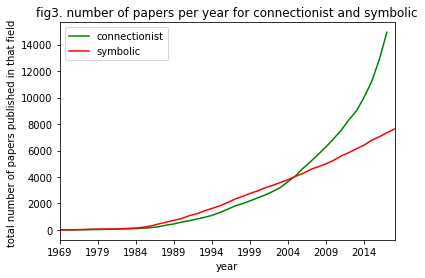

In [75]:
# plotting the two research flavors together - cumulative sum view
ax1 = connectionist.groupby("year").size().cumsum().plot(color='green',label = 'connectionist')
plt.ylabel('total number of papers published in that field ')
plt.title('fig3. number of papers per year for connectionist and symbolic')
ax2 = symbolic.groupby("year").size().cumsum().plot(color='red',label='symbolic')

#get legends for the plot
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h2, l2, loc=2)
plt.show()


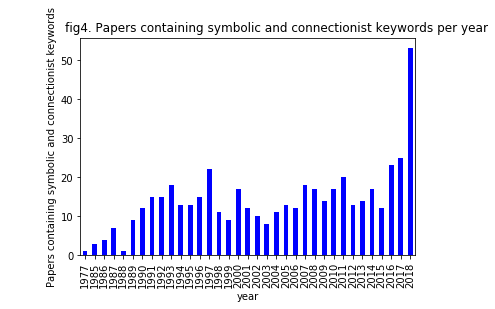

In [76]:
import itertools

connectionistandsymbolic=clean_df[clean_df["title"].apply(lambda x: any(word in x for word in words_symbolic) and any(word in x for word in words_connectionist))]
p = connectionistandsymbolic.groupby("year").size().plot(color='blue',label='both',kind='bar')
plt.size=(100,300)
plt.title("               fig4. Papers containing symbolic and connectionist keywords per year")
plt.ylabel("Papers containing symbolic and connectionist keywords")
plt.show()

### Popularity of symbolic vs connectionist conclusion :

Using fig3 we can see that connectionist focused papers followed an exponential growth from 1984 while symbolic focused papers followed a linear growth from 1984.

As a careful data scientist I feel that looking for just a few keywords in titles of papers isn't enough to infer which subject a paper is really talking about, a better idea would have been working on the full text of the paper tokenizing it, removing stopwords then creating a bag of words of the most popular words used in that paper : with that we could compare with the words we chose as fitting for the AI appreach and infer if the paper truly belongs in that field of research or not.

From fig4 we can see that our method of choosing if a paper belongs to symbolic or connectionist is wrong : There are many papers that we found that belong to "both" so using these results to determine trends isn't useful.

